In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [14]:
df = pd.read_csv('historical_data.csv', parse_dates=['created_at','actual_delivery_time'])


In [15]:
#duplicating to compare later
raw = pd.read_csv('historical_data.csv', parse_dates=['created_at','actual_delivery_time'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [17]:
df['duration'] = (df['actual_delivery_time']-df['created_at']).dt.total_seconds()


In [18]:
df.describe()

market_id                     created_at  \
count  196441.000000                         197428   
mean        2.978706  2015-02-04 22:00:09.537962752   
min         1.000000            2014-10-19 05:24:15   
25%         2.000000            2015-01-29 02:32:42   
50%         3.000000     2015-02-05 03:29:09.500000   
75%         4.000000     2015-02-12 01:39:18.500000   
max         6.000000            2015-02-18 06:00:44   
std         1.524867                            NaN   

                actual_delivery_time       store_id  order_protocol  \
count                         197421  197428.000000   196433.000000   
mean   2015-02-04 22:48:23.348914432    3530.510272        2.882352   
min              2015-01-21 15:58:11       1.000000        1.000000   
25%              2015-01-29 03:22:29    1686.000000        1.000000   
50%              2015-02-05 04:40:41    3592.000000        3.000000   
75%              2015-02-12 02:25:26    5299.000000        4.000000   
max              2015-02-19 22:45:31    6987.000000        7.000000   
std                              NaN    2053.496711        1.503771   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  197428.000000  197428.000000       197428.000000   197428.000000   
mean        3.196391    2682.331402            2.670791      686.218470   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1400.000000            1.000000      299.000000   
50%         3.000000    2200.000000            2.000000      595.000000   
75%         4.000000    3395.000000            3.000000      949.000000   
max       411.000000   27100.000000           20.000000    14700.000000   
std         2.666546    1823.093688            1.630255      522.038648   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   197428.000000          181166.000000       181166.000000   
mean      1159.588630              44.808093           41.739747   
min          0.000000              -4.000000           -5.000000   
25%        800.000000              17.000000           15.000000   
50%       1095.000000              37.000000           34.000000   
75%       1395.000000              65.000000           62.000000   
max      14700.000000             171.000000          154.000000   
std        558.411377              34.526783           32.145733   

       total_outstanding_orders  estimated_order_place_duration  \
count             181166.000000                   197428.000000   
mean                  58.050065                      308.560179   
min                   -6.000000                        0.000000   
25%                   17.000000                      251.000000   
50%                   41.000000                      251.000000   
75%                   85.000000                      446.000000   
max                  285.000000                     2715.000000   
std                   52.661830                       90.139653   

       estimated_store_to_consumer_driving_duration      duration  
count                                 196902.000000  1.974210e+05  
mean                                     545.358935  2.908257e+03  
min                                        0.000000  1.010000e+02  
25%                                      382.000000  2.104000e+03  
50%                                      544.000000  2.660000e+03  
75%                                      702.000000  3.381000e+03  
max                                     2088.000000  8.516859e+06  
std                                      219.352902  1.922961e+04

In [19]:
df.shape

(197428, 17)

In [20]:
df.isna().sum()


market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
duration                                            7
dtype: int64

In [21]:
df.dropna(inplace=True)


In [22]:
df.describe()


market_id                     created_at  \
count  175777.000000                         175777   
mean        2.743726  2015-02-04 19:57:50.009631744   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000            2015-01-29 01:31:19   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000            2015-02-12 01:04:32   
max         6.000000            2015-02-18 06:00:44   
std         1.330963                            NaN   

                actual_delivery_time       store_id  order_protocol  \
count                         175777  175777.000000   175777.000000   
mean   2015-02-04 20:45:36.432303616    3556.299561        2.911752   
min              2015-01-21 16:16:34       1.000000        1.000000   
25%              2015-01-29 02:18:30    1703.000000        1.000000   
50%              2015-02-05 03:45:31    3620.000000        3.000000   
75%              2015-02-12 01:47:32    5341.000000        4.000000   
max              2015-02-19 22:45:31    6987.000000        7.000000   
std                              NaN    2055.959006        1.513128   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders  estimated_order_place_duration  \
count             175777.000000                   175777.000000   
mean                  58.230115                      307.818105   
min                   -6.000000                        0.000000   
25%                   17.000000                      251.000000   
50%                   41.000000                      251.000000   
75%                   85.000000                      446.000000   
max                  285.000000                     2715.000000   
std                   52.731043                       89.796587   

       estimated_store_to_consumer_driving_duration       duration  
count                                 175777.000000  175777.000000  
mean                                     546.077240    2866.422672  
min                                        0.000000     101.000000  
25%                                      384.000000    2105.000000  
50%                                      544.000000    2662.000000  
75%                                      703.000000    3383.000000  
max                                     2088.000000  373879.000000  
std                                      218.717798    1660.741001

In [23]:
# Visualize the distribution of cities/regions (market_id)

market_id_distribution = px.bar(df.market_id.value_counts(), color=df.market_id.unique(), labels={'value': 'Count', 'index': 'Market ID'})
market_id_distribution.update_layout(title='Distribution of Cities/Regions (Market ID)')
market_id_distribution.show()

In [24]:
# Visualize the distribution of order protocols

order_protocol_distribution = px.bar(df.order_protocol.value_counts().sort_values(ascending=False), color=df.order_protocol.unique(), labels={'value': 'Count', 'index': 'Order Protocol'})
order_protocol_distribution.update_layout(title='Distribution of Order Protocols')
order_protocol_distribution.show()

In [25]:
# Visualize the distribution of store primary categories

store_category_distribution = px.bar(df.store_primary_category.value_counts(), color=df.store_primary_category.unique(), labels={'value': 'Count', 'index': 'Store Primary Category'})
store_category_distribution.update_layout(title='Distribution of Store Primary Categories')
store_category_distribution.show()

In [26]:
# Visualize the distribution of deliveries by day of the week. The bar graph will provide clear information about the distribution of deliveries by day of the week.

delivery_day_distribution = px.bar(df.actual_delivery_time.dt.day_name().value_counts(),
                                   color=df.actual_delivery_time.dt.day_name().unique(),
                                   labels={'value': 'Count', 'index': 'Day of the Week'})
delivery_day_distribution.update_layout(title='Distribution of Deliveries by Day of the Week')
delivery_day_distribution.show()

In [27]:
# Visualize the distribution of deliveries by month

delivery_month_distribution = px.bar(df.actual_delivery_time.dt.month_name().value_counts(),
                                     color=df.actual_delivery_time.dt.month_name().unique(),
                                     labels={'value': 'Count', 'index': 'Month'})
delivery_month_distribution.update_layout(title='Distribution of Deliveries by Month')
delivery_month_distribution.show()


In [28]:
# Visualize the distribution of deliveries by day of the month
delivery_day_of_month_distribution = px.bar(df.actual_delivery_time.dt.day.value_counts(),
                                            color=df.actual_delivery_time.dt.day.unique(),
                                            labels={'value': 'Count', 'index': 'Day of the Month'})
delivery_day_of_month_distribution.update_layout(title='Distribution of Deliveries by Day of the Month')
delivery_day_of_month_distribution.show()

In [29]:
# Identify holidays within the data range

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [30]:
start = raw.created_at.dt.date.min()
end = raw.created_at.dt.date.max()
holidays = calendar().holidays(start=start, end=end, return_name=True)
print(f'Holidays in range ({start} - {end}):\n', holidays)

Holidays in range (2014-10-19 - 2015-02-18):
 2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington's Birthday
dtype: object


In [31]:
# Extend the date range for holiday detection

dates_with_margin = pd.date_range(
        start - pd.DateOffset(months=1),
        end + pd.DateOffset(months=4))

In [32]:
dates_with_margin


DatetimeIndex(['2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-27', '2014-09-28',
               ...
               '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12',
               '2015-06-13', '2015-06-14', '2015-06-15', '2015-06-16',
               '2015-06-17', '2015-06-18'],
              dtype='datetime64[ns]', length=273, freq='D')

In [33]:
# Get holidays within the extended date range

holidays = calendar().holidays(
    start=dates_with_margin.min(),
    end=dates_with_margin.max(), return_name=True)
holidays

2014-10-13                           Columbus Day
2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington's Birthday
2015-05-25                           Memorial Day
dtype: object

In [34]:
# Count the number of holidays

is_holiday = pd.Series(pd.Series(dates_with_margin).isin(holidays).values, index=dates_with_margin)
is_holiday.sum()

0

In [35]:
# so we count them as outliers

df.duration.quantile(0.9999)/3600

6.491516444438813

In [36]:
raw.columns


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [37]:
# Identify outliers and clean the data
raw['duration'] = (raw.actual_delivery_time - raw.created_at).dt.total_seconds()

# date_outlier = pd.to_datetime('2014-12-31')
duration_outlier = 60*60*6  # 6 hours

In [38]:
# Remove outliers and rows with missing values in key columns
# cleaned_raw = raw[
#     raw.created_at > date_outlier
# ][
cleaned_raw = raw[raw.duration < duration_outlier
].dropna(how='any',
         subset=[
             'duration',
             'market_id',
             'store_primary_category',
             'order_protocol',
             'total_onshift_dashers',
             'total_busy_dashers',
             'total_outstanding_orders'
         ])

# Display the size difference before and after cleaning

print("Old dataset size: ", (raw.shape), "----->", "New dataset size: ", (cleaned_raw.shape))
cleaned_raw.head()

Old dataset size:  (197428, 17) -----> New dataset size:  (176225, 17)


market_id          created_at actual_delivery_time  store_id  \
0         1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1         2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
8         2.0 2015-02-16 00:11:35  2015-02-16 00:38:01      5477   
14        1.0 2015-02-12 03:36:46  2015-02-12 04:14:39      2841   
15        1.0 2015-01-27 02:12:36  2015-01-27 03:02:24      2841   

   store_primary_category  order_protocol  total_items  subtotal  \
0                american             1.0            4      3441   
1                 mexican             2.0            1      1900   
8                  indian             3.0            4      4771   
14                italian             1.0            1      1525   
15                italian             1.0            2      3620   

    num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                    4             557            1239                   33.0   
1                    1            1400            1400                    1.0   
8                    3             820            1604                    8.0   
14                   1            1525            1525                    5.0   
15                   2            1425            2195                    5.0   

    total_busy_dashers  total_outstanding_orders  \
0                 14.0                      21.0   
1                  2.0                       2.0   
8                  6.0                      18.0   
14                 6.0                       8.0   
15                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  duration  
0                                          861.0    3779.0  
1                                          690.0    4024.0  
8                                          289.0    1586.0  
14                                         795.0    2273.0  
15                                         205.0    2988.0

In [39]:
# Visualize the relationship between subtotal and delivery duration.
# By plotting the frequency of delivery durations for each subtotal amount (in dollars), we can observe the typical or usual durations associated with different order subtotals.

cleaned_raw['subtotal_dollars'] = cleaned_raw['subtotal'] / 100 # Converting cents to dollar

cleaned_raw['duration_hours'] = cleaned_raw['duration'] / 3600 # Converting seconds to hours

subtotal_duration_relationship = px.scatter(cleaned_raw, x='subtotal_dollars', y='duration_hours',
                                            labels={'subtotal_dollars': 'Subtotal ($)', 'duration_hours': 'Delivery Duration (in hours)'})
subtotal_duration_relationship.update_layout(title='Relationship between Subtotal(in dollars) and Delivery Duration')
subtotal_duration_relationship.show()

In [40]:
# Extract basic numerical features

basic_features  = cleaned_raw[[
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_order_place_duration',
    'estimated_store_to_consumer_driving_duration',
    ]]

basic_features.head()

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  
0                                          861.0  
1                                          690.0  
8                                          289.0  
14                                         795.0  
15                                         205.0

In [41]:
# One-hot encode categorical variables

alphabetic_col = cleaned_raw[[
    'market_id',
    'order_protocol',
    'store_primary_category'
]]


In [42]:
alphabetic_col.head()

market_id  order_protocol store_primary_category
0         1.0             1.0               american
1         2.0             2.0                mexican
8         2.0             3.0                 indian
14        1.0             1.0                italian
15        1.0             1.0                italian

In [43]:
from sklearn.preprocessing import OneHotEncoder as ohe

encoder = ohe()
encoder.fit(alphabetic_col[['market_id', 'order_protocol', 'store_primary_category']])
encoded_column = encoder.transform(alphabetic_col[['market_id', 'order_protocol', 'store_primary_category']]).toarray()

print(encoded_column.shape)
encoded_values = pd.concat([pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out(['market_id', 'order_protocol', 'store_primary_category']))], axis=1)
encoded_values.head()

# Merge encoded columns with basic features
encoded_table = pd.merge(basic_features, encoded_values, left_index=True, right_index=True, how='left')
encoded_table.head()
encoded_table.shape
encoded_table.head()

(176225, 86)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  ...  \
0                                          861.0  ...   
1                                          690.0  ...   
8                                          289.0  ...   
14                                         795.0  ...   
15                                         205.0  ...   

    store_primary_category_southern  store_primary_category_spanish  \
0                               0.0                             0.0   
1                               0.0                             0.0   
8                               0.0                             0.0   
14                              0.0                             0.0   
15                              0.0                             0.0   

    store_primary_category_steak  store_primary_category_sushi  \
0                            0.0                           0.0   
1                            0.0                           0.0   
8                            0.0                           0.0   
14                           0.0                           0.0   
15                           0.0                           0.0   

    store_primary_category_tapas  store_primary_category_thai  \
0                            0.0                          0.0   
1                            0.0                          0.0   
8                            0.0                          0.0   
14                           0.0                          0.0   
15                           0.0                          0.0   

    store_primary_category_turkish  store_primary_category_vegan  \
0                              0.0                           0.0   
1                              0.0                           0.0   
8                              0.0                           0.0   
14                             0.0                           0.0   
15                             0.0                           0.0   

    store_primary_category_vegetarian  store_primary_category_vietnamese  
0                                 0.0                                0.0  
1                                 0.0                                0.0  
8                                 0.0                                0.0  
14                                0.0                                0.0  
15                                0.0                                0.0  

[5 rows x 96 columns]

In [44]:
# merging encoded_column with cleaned_raw and not resetting the index.
encoded_table = pd.merge(basic_features, encoded_values, left_index=True, right_index=True, how='left')

#display

print("Shape:", encoded_table.shape)
encoded_table.head()

Shape: (176225, 96)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  ...  \
0                                          861.0  ...   
1                                          690.0  ...   
8                                          289.0  ...   
14                                         795.0  ...   
15                                         205.0  ...   

    store_primary_category_southern  store_primary_category_spanish  \
0                               0.0                             0.0   
1                               0.0                             0.0   
8                               0.0                             0.0   
14                              0.0                             0.0   
15                              0.0                             0.0   

    store_primary_category_steak  store_primary_category_sushi  \
0                            0.0                           0.0   
1                            0.0                           0.0   
8                            0.0                           0.0   
14                           0.0                           0.0   
15                           0.0                           0.0   

    store_primary_category_tapas  store_primary_category_thai  \
0                            0.0                          0.0   
1                            0.0                          0.0   
8                            0.0                          0.0   
14                           0.0                          0.0   
15                           0.0                          0.0   

    store_primary_category_turkish  store_primary_category_vegan  \
0                              0.0                           0.0   
1                              0.0                           0.0   
8                              0.0                           0.0   
14                             0.0                           0.0   
15                             0.0                           0.0   

    store_primary_category_vegetarian  store_primary_category_vietnamese  
0                                 0.0                                0.0  
1                                 0.0                                0.0  
8                                 0.0                                0.0  
14                                0.0                                0.0  
15                                0.0                                0.0  

[5 rows x 96 columns]

In [45]:
def harmonic_func(value, period):
  value *= 2 * np.pi / period
  return np.cos(value), np.sin(value)

df = pd.DataFrame(index=df.created_at.dt.normalize().unique())
df['cos_day'], df['sin_day'] = harmonic_func(df.index.day, df.index.days_in_month)
df['cos_week'], df['sin_week'] = harmonic_func(df.index.day_of_week, 7)
df['cos_month'], df['sin_month'] = harmonic_func(df.index.month, 12)
df['cos_quater'], df['sin_quater'] = harmonic_func(df.index.quarter, 4)
df['cos_year'], df['sin_year'] = harmonic_func(df.index.year, 365)
df.head(3)

df['is_holiday'] = df.index.isin(holidays)
dates_extended = pd.date_range(pd.to_datetime(df.index.min()) - pd.DateOffset(months=4), pd.to_datetime(df.index.max()) + pd.DateOffset(months=4))
holiday_ = calendar().holidays(start=dates_extended.min(), end=dates_extended.max())
df['is_holiday'] = df.index.isin(holiday_)
df.head()

cos_day   sin_day  cos_week  sin_week  cos_month  sin_month  \
2015-02-06  0.222521  0.974928 -0.900969 -0.433884   0.500000   0.866025   
2015-02-10 -0.623490  0.781831  0.623490  0.781831   0.500000   0.866025   
2015-02-16 -0.900969 -0.433884  1.000000  0.000000   0.500000   0.866025   
2015-02-12 -0.900969  0.433884 -0.900969  0.433884   0.500000   0.866025   
2015-01-27  0.688967 -0.724793  0.623490  0.781831   0.866025   0.500000   

              cos_quater  sin_quater  cos_year  sin_year  is_holiday  
2015-02-06  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-10  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-16  6.123234e-17         1.0 -0.991677 -0.128748        True  
2015-02-12  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-01-27  6.123234e-17         1.0 -0.991677 -0.128748       False

In [46]:
df['is_holiday'] = df.index.isin(holidays)
dates_extended = pd.date_range(pd.to_datetime(df.index.min()) - pd.DateOffset(months=4), pd.to_datetime(df.index.max()) + pd.DateOffset(months=4))
holiday_ = calendar().holidays(start=dates_extended.min(), end=dates_extended.max())
df['is_holiday'] = df.index.isin(holiday_)
print(df.shape)
df.head()

(29, 11)


cos_day   sin_day  cos_week  sin_week  cos_month  sin_month  \
2015-02-06  0.222521  0.974928 -0.900969 -0.433884   0.500000   0.866025   
2015-02-10 -0.623490  0.781831  0.623490  0.781831   0.500000   0.866025   
2015-02-16 -0.900969 -0.433884  1.000000  0.000000   0.500000   0.866025   
2015-02-12 -0.900969  0.433884 -0.900969  0.433884   0.500000   0.866025   
2015-01-27  0.688967 -0.724793  0.623490  0.781831   0.866025   0.500000   

              cos_quater  sin_quater  cos_year  sin_year  is_holiday  
2015-02-06  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-10  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-16  6.123234e-17         1.0 -0.991677 -0.128748        True  
2015-02-12  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-01-27  6.123234e-17         1.0 -0.991677 -0.128748       False

In [47]:
# Merge calendar features with the cleaned dataset

calender_features = pd.DataFrame({'normalized_date': cleaned_raw.created_at.dt.normalize()}, index=cleaned_raw.index) \
        .merge(df.fillna(0), left_on='normalized_date', right_index=True) \
        .drop(columns=['normalized_date'])

print(calender_features.shape)
calender_features.head()

(176225, 11)


cos_day   sin_day  cos_week  sin_week  cos_month  sin_month  \
0    0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
16   0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
51   0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
72   0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
121  0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   

       cos_quater  sin_quater  cos_year  sin_year  is_holiday  
0    6.123234e-17         1.0 -0.991677 -0.128748       False  
16   6.123234e-17         1.0 -0.991677 -0.128748       False  
51   6.123234e-17         1.0 -0.991677 -0.128748       False  
72   6.123234e-17         1.0 -0.991677 -0.128748       False  
121  6.123234e-17         1.0 -0.991677 -0.128748       False

In [48]:
# Generate time-based harmonic features

# calculates the total time of the day in minutes, considering both the hour and minute components of the created_at timestamp
min_cos, min_sin = harmonic_func(cleaned_raw.created_at.dt.hour*60 + cleaned_raw.created_at.dt.minute, 24*60*60)

time_features = pd.DataFrame({'min_cos': min_cos, 'min_sin': min_sin}, index=cleaned_raw.index)
time_features.head()

min_cos   min_sin
0   0.995227  0.097583
1   0.995473  0.095049
8   1.000000  0.000800
14  0.999877  0.015707
15  0.999954  0.009599

In [49]:
# Combine all features into a single DataFrame

features = pd.concat([basic_features, encoded_table, calender_features, time_features], axis=1)
display(features)

total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
8                 4      4771                   3             820   
14                1      1525                   1            1525   
15                2      3620                   2            1425   
...             ...       ...                 ...             ...   
197423            3      1389                   3             345   
197424            6      3010                   4             405   
197425            5      1836                   3             300   
197426            1      1175                   1             535   
197427            4      2605                   4             425   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
0                 1239                   33.0                14.0   
1                 1400                    1.0                 2.0   
8                 1604                    8.0                 6.0   
14                1525                    5.0                 6.0   
15                2195                    5.0                 5.0   
...                ...                    ...                 ...   
197423             649                   17.0                17.0   
197424             825                   12.0                11.0   
197425             399                   39.0                41.0   
197426             535                    7.0                 7.0   
197427             750                   20.0                20.0   

        total_outstanding_orders  estimated_order_place_duration  \
0                           21.0                             446   
1                            2.0                             446   
8                           18.0                             446   
14                           8.0                             446   
15                           7.0                             446   
...                          ...                             ...   
197423                      23.0                             251   
197424                      14.0                             251   
197425                      40.0                             251   
197426                      12.0                             446   
197427                      23.0                             446   

        estimated_store_to_consumer_driving_duration  ...  sin_week  \
0                                              861.0  ... -0.433884   
1                                              690.0  ...  0.781831   
8                                              289.0  ...  0.000000   
14                                             795.0  ...  0.433884   
15                                             205.0  ...  0.781831   
...                                              ...  ...       ...   
197423                                         331.0  ...  0.781831   
197424                                         915.0  ... -0.433884   
197425                                         795.0  ... -0.974928   
197426                                         384.0  ... -0.781831   
197427                                         134.0  ... -0.781831   

        cos_month  sin_month    cos_quater  sin_quater  cos_year  sin_year  \
0        0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
1        0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
8        0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
14       0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
15       0.866025   0.500000  6.123234e-17         1.0 -0.991677 -0.128748   
...           ...        ...           ...         ...       ...       ...   
197423   0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
197424   0.500000   0.866025  6.123234e-17         1.0 -

In [50]:
# Removing duplicate columns in features

features = features.loc[:,~features.columns.duplicated()]
display(features)


total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
8                 4      4771                   3             820   
14                1      1525                   1            1525   
15                2      3620                   2            1425   
...             ...       ...                 ...             ...   
197423            3      1389                   3             345   
197424            6      3010                   4             405   
197425            5      1836                   3             300   
197426            1      1175                   1             535   
197427            4      2605                   4             425   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
0                 1239                   33.0                14.0   
1                 1400                    1.0                 2.0   
8                 1604                    8.0                 6.0   
14                1525                    5.0                 6.0   
15                2195                    5.0                 5.0   
...                ...                    ...                 ...   
197423             649                   17.0                17.0   
197424             825                   12.0                11.0   
197425             399                   39.0                41.0   
197426             535                    7.0                 7.0   
197427             750                   20.0                20.0   

        total_outstanding_orders  estimated_order_place_duration  \
0                           21.0                             446   
1                            2.0                             446   
8                           18.0                             446   
14                           8.0                             446   
15                           7.0                             446   
...                          ...                             ...   
197423                      23.0                             251   
197424                      14.0                             251   
197425                      40.0                             251   
197426                      12.0                             446   
197427                      23.0                             446   

        estimated_store_to_consumer_driving_duration  ...  sin_week  \
0                                              861.0  ... -0.433884   
1                                              690.0  ...  0.781831   
8                                              289.0  ...  0.000000   
14                                             795.0  ...  0.433884   
15                                             205.0  ...  0.781831   
...                                              ...  ...       ...   
197423                                         331.0  ...  0.781831   
197424                                         915.0  ... -0.433884   
197425                                         795.0  ... -0.974928   
197426                                         384.0  ... -0.781831   
197427                                         134.0  ... -0.781831   

        cos_month  sin_month    cos_quater  sin_quater  cos_year  sin_year  \
0        0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
1        0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
8        0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
14       0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
15       0.866025   0.500000  6.123234e-17         1.0 -0.991677 -0.128748   
...           ...        ...           ...         ...       ...       ...   
197423   0.500000   0.866025  6.123234e-17         1.0 -0.991677 -0.128748   
197424   0.500000   0.866025  6.123234e-17         1.0 -

In [51]:
target = cleaned_raw.reindex(columns=['duration'])
target.head(3)

duration
0    3779.0
1    4024.0
8    1586.0

In [52]:
#save prepared dataset

dataset = pd.concat([features,target],axis=1)
dataset.head(3)

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
8            4      4771                   3             820            1604   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
8                    8.0                 6.0                      18.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
8                             446   

   estimated_store_to_consumer_driving_duration  ...  cos_month  sin_month  \
0                                         861.0  ...        0.5   0.866025   
1                                         690.0  ...        0.5   0.866025   
8                                         289.0  ...        0.5   0.866025   

     cos_quater  sin_quater  cos_year  sin_year  is_holiday   min_cos  \
0  6.123234e-17         1.0 -0.991677 -0.128748       False  0.995227   
1  6.123234e-17         1.0 -0.991677 -0.128748       False  0.995473   
8  6.123234e-17         1.0 -0.991677 -0.128748        True  1.000000   

    min_sin  duration  
0  0.097583    3779.0  
1  0.095049    4024.0  
8  0.000800    1586.0  

[3 rows x 110 columns]

In [53]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error

cleaned_df = dataset

cleaned_df.reset_index(drop=True)
print(cleaned_df.index.duplicated().any())

# create a dataframe y that takes duration from clean_df and reindex it
y = cleaned_df['duration'].to_frame()
y = y.reset_index(drop=True)
assert y.isnull().any().any() == False
y

x = cleaned_df.drop(columns=['duration'])
x = x.reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=2)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)
cleaned_df = cleaned_df.reset_index(drop=True)
display(cleaned_df)

False
(140980, 109)
(35245, 109)
(140980, 1)
(35245, 1)


total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
176220            3      1389                   3             345   
176221            6      3010                   4             405   
176222            5      1836                   3             300   
176223            1      1175                   1             535   
176224            4      2605                   4             425   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
0                 1239                   33.0                14.0   
1                 1400                    1.0                 2.0   
2                 1604                    8.0                 6.0   
3                 1525                    5.0                 6.0   
4                 2195                    5.0                 5.0   
...                ...                    ...                 ...   
176220             649                   17.0                17.0   
176221             825                   12.0                11.0   
176222             399                   39.0                41.0   
176223             535                    7.0                 7.0   
176224             750                   20.0                20.0   

        total_outstanding_orders  estimated_order_place_duration  \
0                           21.0                             446   
1                            2.0                             446   
2                           18.0                             446   
3                            8.0                             446   
4                            7.0                             446   
...                          ...                             ...   
176220                      23.0                             251   
176221                      14.0                             251   
176222                      40.0                             251   
176223                      12.0                             446   
176224                      23.0                             446   

        estimated_store_to_consumer_driving_duration  ...  cos_month  \
0                                              861.0  ...   0.500000   
1                                              690.0  ...   0.500000   
2                                              289.0  ...   0.500000   
3                                              795.0  ...   0.500000   
4                                              205.0  ...   0.866025   
...                                              ...  ...        ...   
176220                                         331.0  ...   0.500000   
176221                                         915.0  ...   0.500000   
176222                                         795.0  ...   0.866025   
176223                                         384.0  ...   0.500000   
176224                                         134.0  ...   0.500000   

        sin_month    cos_quater  sin_quater  cos_year  sin_year  is_holiday  \
0        0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
1        0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
2        0.866025  6.123234e-17         1.0 -0.991677 -0.128748        True   
3        0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
4        0.500000  6.123234e-17         1.0 -0.991677 -0.128748       False   
...           ...           ...         ...       ...       ...         ...   
176220   0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
176221   0.866025  6.123234e-17     

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
dataset.to_csv('/content/drive/My Drive/cleaned_data_new.csv')

In [56]:
basic_features_x = cleaned_df[['total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_order_place_duration',
    'estimated_store_to_consumer_driving_duration']]
basic_features_x.head(5)

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         289.0  
3                                         795.0  
4                                         205.0

In [57]:
basic_x_train, basic_x_test, basic_y_train, basic_y_test = train_test_split(basic_features_x, y, test_size=.2, shuffle=True, random_state=2)
basic_x_train = basic_x_train.fillna(0)
basic_x_test = basic_x_test.fillna(0)
for i in [basic_x_train, basic_y_train, basic_x_test, basic_y_test]:
  print(i.shape)

(140980, 10)
(140980, 1)
(35245, 10)
(35245, 1)


In [58]:
basic_x_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [59]:
import xgboost as xgb

# Pass 'early_stopping_rounds' to the XGBRegressor constructor
model = xgb.XGBRegressor(early_stopping_rounds=10)
history = model.fit(
    basic_x_train, basic_y_train,
    eval_set=[(basic_x_test, basic_y_test)],
)

# Evaluate the model performance using the RMSE metric
from sklearn.metrics import mean_squared_error
y_pred = model.predict(basic_x_test)
rmse = mean_squared_error(basic_y_test, y_pred, squared=False)
print("RMSE:", rmse)

[0]	validation_0-rmse:1071.06041
[1]	validation_0-rmse:1041.63125
[2]	validation_0-rmse:1020.42728
[3]	validation_0-rmse:1006.08854
[4]	validation_0-rmse:996.41284
[5]	validation_0-rmse:990.65061
[6]	validation_0-rmse:985.66562
[7]	validation_0-rmse:977.14703
[8]	validation_0-rmse:972.73645
[9]	validation_0-rmse:969.66108
[10]	validation_0-rmse:968.02917
[11]	validation_0-rmse:964.00983
[12]	validation_0-rmse:962.05669
[13]	validation_0-rmse:959.50220
[14]	validation_0-rmse:958.64879
[15]	validation_0-rmse:956.29749
[16]	validation_0-rmse:955.60454
[17]	validation_0-rmse:953.62683
[18]	validation_0-rmse:953.26611
[19]	validation_0-rmse:952.01966
[20]	validation_0-rmse:951.43047
[21]	validation_0-rmse:951.19363
[22]	validation_0-rmse:949.80489
[23]	validation_0-rmse:949.50472
[24]	validation_0-rmse:949.52219
[25]	validation_0-rmse:949.56208
[26]	validation_0-rmse:948.99087
[27]	validation_0-rmse:948.79953
[28]	validation_0-rmse:948.32524
[29]	validation_0-rmse:948.27795
[30]	validation_

<Axes: >

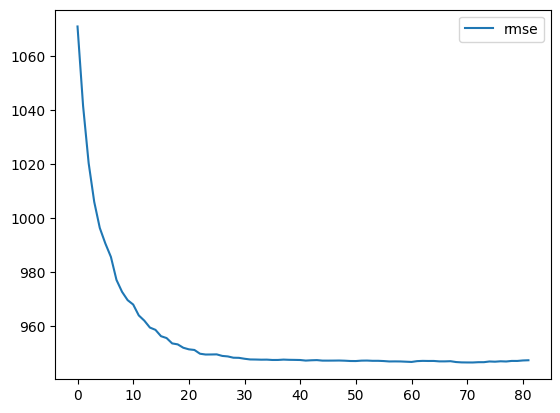

In [60]:
pd.DataFrame(history.evals_result()['validation_0']).plot()


In [61]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [62]:
model = xgboost.XGBRegressor(verbose=0, use_label_encoder =False)
params={
    'booster': ['gbtree'], #['dart'] - best but shap not supported, #['gbtree', 'gblinear', 'dart'],
    'objective': ['reg:gamma'], #['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic', 'reg:gamma'],
    'max_depth': [7], #[3, 4, 5, 6, 7, 10, 15], #--
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [300, 350, 400],
    'min_child_weight': [1, 10], #++
    'colsample_bytree': [0.8],
    'subsample': [0.75],
    'reg_alpha': [0],
    'reg_lambda': [2],
    'gamma' : [0],
    }

In [63]:
cv = KFold(5, shuffle=True, random_state=2)
rs = GridSearchCV(
    model,
    params,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=5,
    verbose=False)

In [64]:
rs.fit(x,y,verbose=True)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.8],
                         'gamma': [0], 'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [7], 'min_child_weight': [1, 10],
                         'n_estimators': [300, 350, 400],
                         'objective': ['reg:gamma'], 'reg_alpha': [0],
                         'reg_lambda': [2], 'subsample': [0.75]},
             scoring='neg_mean_squared_error', verbose=False)

In [65]:
print('best params:', rs.best_params_)


best params: {'booster': 'gbtree', 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 350, 'objective': 'reg:gamma', 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.75}


In [66]:
# best params: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 350, 'objective': 'reg:gamma'}
best_params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'max_depth': 7,
    'learning_rate': 0.1,
    'n_estimators': 350,
    'verbose':0
}

In [ ]:
model = xgboost.XGBRegressor(**best_params)
history = model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric=['mae', 'rmse'],
    verbose = 0,
    early_stopping_rounds=int(best_params.get('n_estimators', 100) * 0.1))

In [ ]:

pd.DataFrame(history.evals_result()['validation_0']).plot()


In [ ]:
# Using metrics like RMSE, MAE to see model accuracy

y_true = y_test
y_pred = model.predict(x_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MAE: ', mean_absolute_error(y_true, y_pred))

In [ ]:
# Plotting to see model performance

import matplotlib.pyplot as plt

# Plotting the first 50 samples
plot_data = pd.DataFrame({
    'pred': y_pred,
    'real': y_true.duration,
    'diff': (y_pred - y_true.duration).abs(),
}).iloc[:50]

plot_data.plot.bar(y=['pred', 'real', 'diff'], figsize=(15, 5))
plt.xlabel('Sample Index')
plt.ylabel('Duration')
plt.title('Comparison of Predicted and Real Durations')
plt.legend(['Predicted Duration', 'Real Duration'])
plt.show()
